# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [2]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Korea" 
icon_path = "%s.png" % icon

### 데이터 입력

In [11]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("연설문.txt", 'r', encoding='euc-kr')
message_of_moon = f.read()
print(message_of_moon)
f.close()

청년 일자리 대책 발표문

존경하는 국민여러분

오늘 저희 경제팀은 청년 일자리 대책을
설명 드리고자 이 자리에 섰습니다.

우리사회의 미래인 청년의 일자리 어려움이 커지고 있습니다.

IMF 위기 이후 청년실업률과 전체 실업률의 격차가 지속적으로 확대되고 있습니다(‘90년대 3.4%p → ’17년 6.1%p)
청년 체감실업률도 통계작성(‘15년) 이후
20%를 지속 상회하고 있습니다.

청년 일자리 부진은 어제 오늘의 일이 아닙니다. 
구조적 문제입니다.

기술진보와 자동화로 청년이 주로 가는 
사무직·생산직 일자리가 줄어들고 있습니다.

반도체?조선?자동차 등 우리경제 주력산업의 고용창출력은 갈수록 둔화되고 있습니다.

외환위기 이후 산업성숙화로 대기업의 신규채용은 계속해서 위축되고 있습니다. 

중소기업은 빈 일자리가 20만개를 상회하지만
사회보상체계의 왜곡으로 
청년들이 기피하는 미스매치가 심화되고 있습니다.

신설된 창업기업이 평균 2.9개의 일자리를 만들지만 창업활동은 부진합니다.

동질화된 교육과 정규직 과보호 등 노동시장 이중구조도
청년 일자리의 제약요인입니다.

이와 같은 구조적인 문제 외에 
인구구조 변화로 인해 
향후 수년간 더 심각한 고용절벽이 예상됩니다.

‘21년까지 39만명의 에코세대(’91~‘96년생)가 20대 후반이 되면서
본격 구직활동을 하게 됩니다.

그대로 방치할 경우
39만명 중 14만명은 실업자가 될 것으로 예견됩니다.
청년과 국가 모두에 재난수준의 고용위기 상황입니다.

또한 구조조정 등으로 어려움이 커지고 있는일부 지역에 대한 정책적 배려도 필요합니다.

앞서 말씀드린 구조적인 청년 일자리 문제 해결을 위한 지속적인 노력이 필요합니다.

정부도 이러한 구조적 문제 해결을 위한 노력을 임기내내 지속하겠지만
기업·노동계·학계·시민사회·학부모 등 사회구성원 모두가 참여하는 근본적인 인식·제도의 개선이 필요합니다.

이와 함께 인구구조 변화로 인한 재난상황 해결을 위한 특단의 한시대책도 필요합니다.

이번 특단의 대책은 ‘청

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [12]:
# 연설문 1번 전처리
message_of_moon = message_of_moon.split('\n\n')
message_of_moon

['청년 일자리 대책 발표문',
 '존경하는 국민여러분',
 '오늘 저희 경제팀은 청년 일자리 대책을\n설명 드리고자 이 자리에 섰습니다.',
 '우리사회의 미래인 청년의 일자리 어려움이 커지고 있습니다.',
 'IMF 위기 이후 청년실업률과 전체 실업률의 격차가 지속적으로 확대되고 있습니다(‘90년대 3.4%p → ’17년 6.1%p)\n청년 체감실업률도 통계작성(‘15년) 이후\n20%를 지속 상회하고 있습니다.',
 '청년 일자리 부진은 어제 오늘의 일이 아닙니다. \n구조적 문제입니다.',
 '기술진보와 자동화로 청년이 주로 가는 \n사무직·생산직 일자리가 줄어들고 있습니다.',
 '반도체?조선?자동차 등 우리경제 주력산업의 고용창출력은 갈수록 둔화되고 있습니다.',
 '외환위기 이후 산업성숙화로 대기업의 신규채용은 계속해서 위축되고 있습니다. ',
 '중소기업은 빈 일자리가 20만개를 상회하지만\n사회보상체계의 왜곡으로 \n청년들이 기피하는 미스매치가 심화되고 있습니다.',
 '신설된 창업기업이 평균 2.9개의 일자리를 만들지만 창업활동은 부진합니다.',
 '동질화된 교육과 정규직 과보호 등 노동시장 이중구조도\n청년 일자리의 제약요인입니다.',
 '이와 같은 구조적인 문제 외에 \n인구구조 변화로 인해 \n향후 수년간 더 심각한 고용절벽이 예상됩니다.',
 '‘21년까지 39만명의 에코세대(’91~‘96년생)가 20대 후반이 되면서\n본격 구직활동을 하게 됩니다.',
 '그대로 방치할 경우\n39만명 중 14만명은 실업자가 될 것으로 예견됩니다.\n청년과 국가 모두에 재난수준의 고용위기 상황입니다.',
 '또한 구조조정 등으로 어려움이 커지고 있는일부 지역에 대한 정책적 배려도 필요합니다.',
 '앞서 말씀드린 구조적인 청년 일자리 문제 해결을 위한 지속적인 노력이 필요합니다.',
 '정부도 이러한 구조적 문제 해결을 위한 노력을 임기내내 지속하겠지만\n기업·노동계·학계·시민사회·학부모 등 사회구성원 모두가 참여하는 근본적인 인식·제도의 개선이 필요

In [13]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_moon)
tf_bow1 = tf_vectorizer.fit_transform(message_of_moon)
tf_bow1

<73x633 sparse matrix of type '<class 'numpy.int64'>'
	with 819 stored elements in Compressed Sparse Row format>

In [14]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

633
633


['000만원까지',
 '10만개',
 '10만원',
 '12만개까지',
 '14만명',
 '14만명은',
 '15년',
 '17년',
 '18',
 '1년',
 '1명을',
 '1억원의',
 '1조원',
 '1천만원과5천만원의',
 '20',
 '20대',
 '20만개를',
 '20억원까지',
 '21년까지',
 '22만개의',
 '2만명의',
 '39만명',
 '39만명의',
 '3년간',
 '3천만원의',
 '4년간',
 '4대',
 '4월중',
 '4월초',
 '4차',
 '4천명',
 '500만원까지',
 '500만원을',
 '5년간',
 '7만명',
 '800만원',
 '90',
 '900만원을',
 '90년대',
 '91',
 '96년생',
 '9개의',
 'ai',
 'd자금',
 'imf',
 'track',
 'two',
 '中企',
 '新서비스',
 '가는',
 '가능하도록',
 '가속화',
 '가지',
 '가칭',
 '갈수록',
 '감면하겠습니다',
 '감축하겠습니다',
 '강화',
 '강화하겠습니다',
 '갖고',
 '같은',
 '개도국',
 '개선',
 '개선이',
 '개선하고',
 '개정을',
 '개편안도',
 '개혁을',
 '검토하겠습니다',
 '것으로',
 '것처럼',
 '격차가',
 '격차도',
 '겪는',
 '결합되는',
 '경력인정을',
 '경우',
 '경제',
 '경제사회전반의',
 '경제의',
 '경제팀은',
 '경험과',
 '계속해서',
 '고도화하겠습니다',
 '고용',
 '고용노동부',
 '고용문제의',
 '고용위기',
 '고용위기지역',
 '고용을',
 '고용절벽이',
 '고용증대기업에',
 '고용창출력은',
 '고용확대도',
 '고졸',
 '고취하겠습니다',
 '공간',
 '공급',
 '공유경제',
 '과감한',
 '과보호',
 '과제들도',
 '과제들은',
 '과제들의',
 '과학기술정보통신부',
 '관련',
 '교부세',
 '교육',
 '교육과',
 '교통비도',
 '구조개혁을',
 '구조적',
 '구조적인'

In [15]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['000만원까지', '10만개', '10만원', '12만개까지', '14만명', '14만명은', '15년', '17년', '18', '1년', '1명을', '1억원의', '1조원', '1천만원과5천만원의', '20', '20대', '20만개를', '20억원까지', '21년까지', '22만개의', '2만명의', '39만명', '39만명의', '3년간', '3천만원의', '4년간', '4대', '4월중', '4월초', '4차', '4천명', '500만원까지', '500만원을', '5년간', '7만명', '800만원', '90', '900만원을', '90년대', '91', '96년생', '9개의', 'ai', 'd자금', 'imf', 'track', 'two', '中企', '新서비스', '가는', '가능하도록', '가속화', '가지', '가칭', '갈수록', '감면하겠습니다', '감축하겠습니다', '강화', '강화하겠습니다', '갖고', '같은', '개도국', '개선', '개선이', '개선하고', '개정을', '개편안도', '개혁을', '검토하겠습니다', '것으로', '것처럼', '격차가', '격차도', '겪는', '결합되는', '경력인정을', '경우', '경제', '경제사회전반의', '경제의', '경제팀은', '경험과', '계속해서', '고도화하겠습니다', '고용', '고용노동부', '고용문제의', '고용위기', '고용위기지역', '고용을', '고용절벽이', '고용증대기업에', '고용창출력은', '고용확대도', '고졸', '고취하겠습니다', '공간', '공급', '공유경제', '과감한', '과보호', '과제들도', '과제들은', '과제들의', '과학기술정보통신부', '관련', '교부세', '교육', '교육과', '교통비도', '구조개혁을', '구조적', '구조적인', '구조조정', '구직활동을', '구축을', '국가', '국가차원의', '국민', '국민여러분', '국비유학', '국토교통부', '국회', '국회에', '규제', '규제를', '규제혁신', '그대로'

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,
        1,  1,  1,  1,  2,  1,  1,  3,  1,  2,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  2,  1,  1,  4,  2,  1,  1,  1,  1,  1,  2,
        2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,  1,  2,  1,
        2,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,
        1,  1,  1,  1,  2,  2,  1,  1,  2,  1,  6,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  4,  1,  1,  1,
        2,  1,  1,  1,  1,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1,  2,  1,
        2,  1,  3,  1,  1

In [16]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'000만원까지': 1,
 '10만개': 1,
 '10만원': 1,
 '12만개까지': 1,
 '14만명': 1,
 '14만명은': 1,
 '15년': 1,
 '17년': 1,
 '18': 1,
 '1년': 1,
 '1명을': 1,
 '1억원의': 1,
 '1조원': 1,
 '1천만원과5천만원의': 1,
 '20': 1,
 '20대': 1,
 '20만개를': 1,
 '20억원까지': 1,
 '21년까지': 2,
 '22만개의': 1,
 '2만명의': 1,
 '39만명': 1,
 '39만명의': 1,
 '3년간': 1,
 '3천만원의': 1,
 '4년간': 1,
 '4대': 1,
 '4월중': 1,
 '4월초': 1,
 '4차': 1,
 '4천명': 1,
 '500만원까지': 1,
 '500만원을': 1,
 '5년간': 2,
 '7만명': 1,
 '800만원': 1,
 '90': 1,
 '900만원을': 1,
 '90년대': 1,
 '91': 1,
 '96년생': 1,
 '9개의': 1,
 'ai': 1,
 'd자금': 1,
 'imf': 1,
 'track': 1,
 'two': 1,
 '中企': 1,
 '新서비스': 2,
 '가는': 1,
 '가능하도록': 1,
 '가속화': 1,
 '가지': 1,
 '가칭': 1,
 '갈수록': 1,
 '감면하겠습니다': 2,
 '감축하겠습니다': 1,
 '강화': 1,
 '강화하겠습니다': 3,
 '갖고': 1,
 '같은': 2,
 '개도국': 1,
 '개선': 1,
 '개선이': 2,
 '개선하고': 1,
 '개정을': 1,
 '개편안도': 1,
 '개혁을': 1,
 '검토하겠습니다': 1,
 '것으로': 1,
 '것처럼': 1,
 '격차가': 1,
 '격차도': 1,
 '겪는': 1,
 '결합되는': 1,
 '경력인정을': 1,
 '경우': 2,
 '경제': 1,
 '경제사회전반의': 1,
 '경제의': 1,
 '경제팀은': 1,
 '경험과': 1,
 '계속해서': 1,
 '고도화하겠습니다': 1,
 '고용': 1,

### 시각화

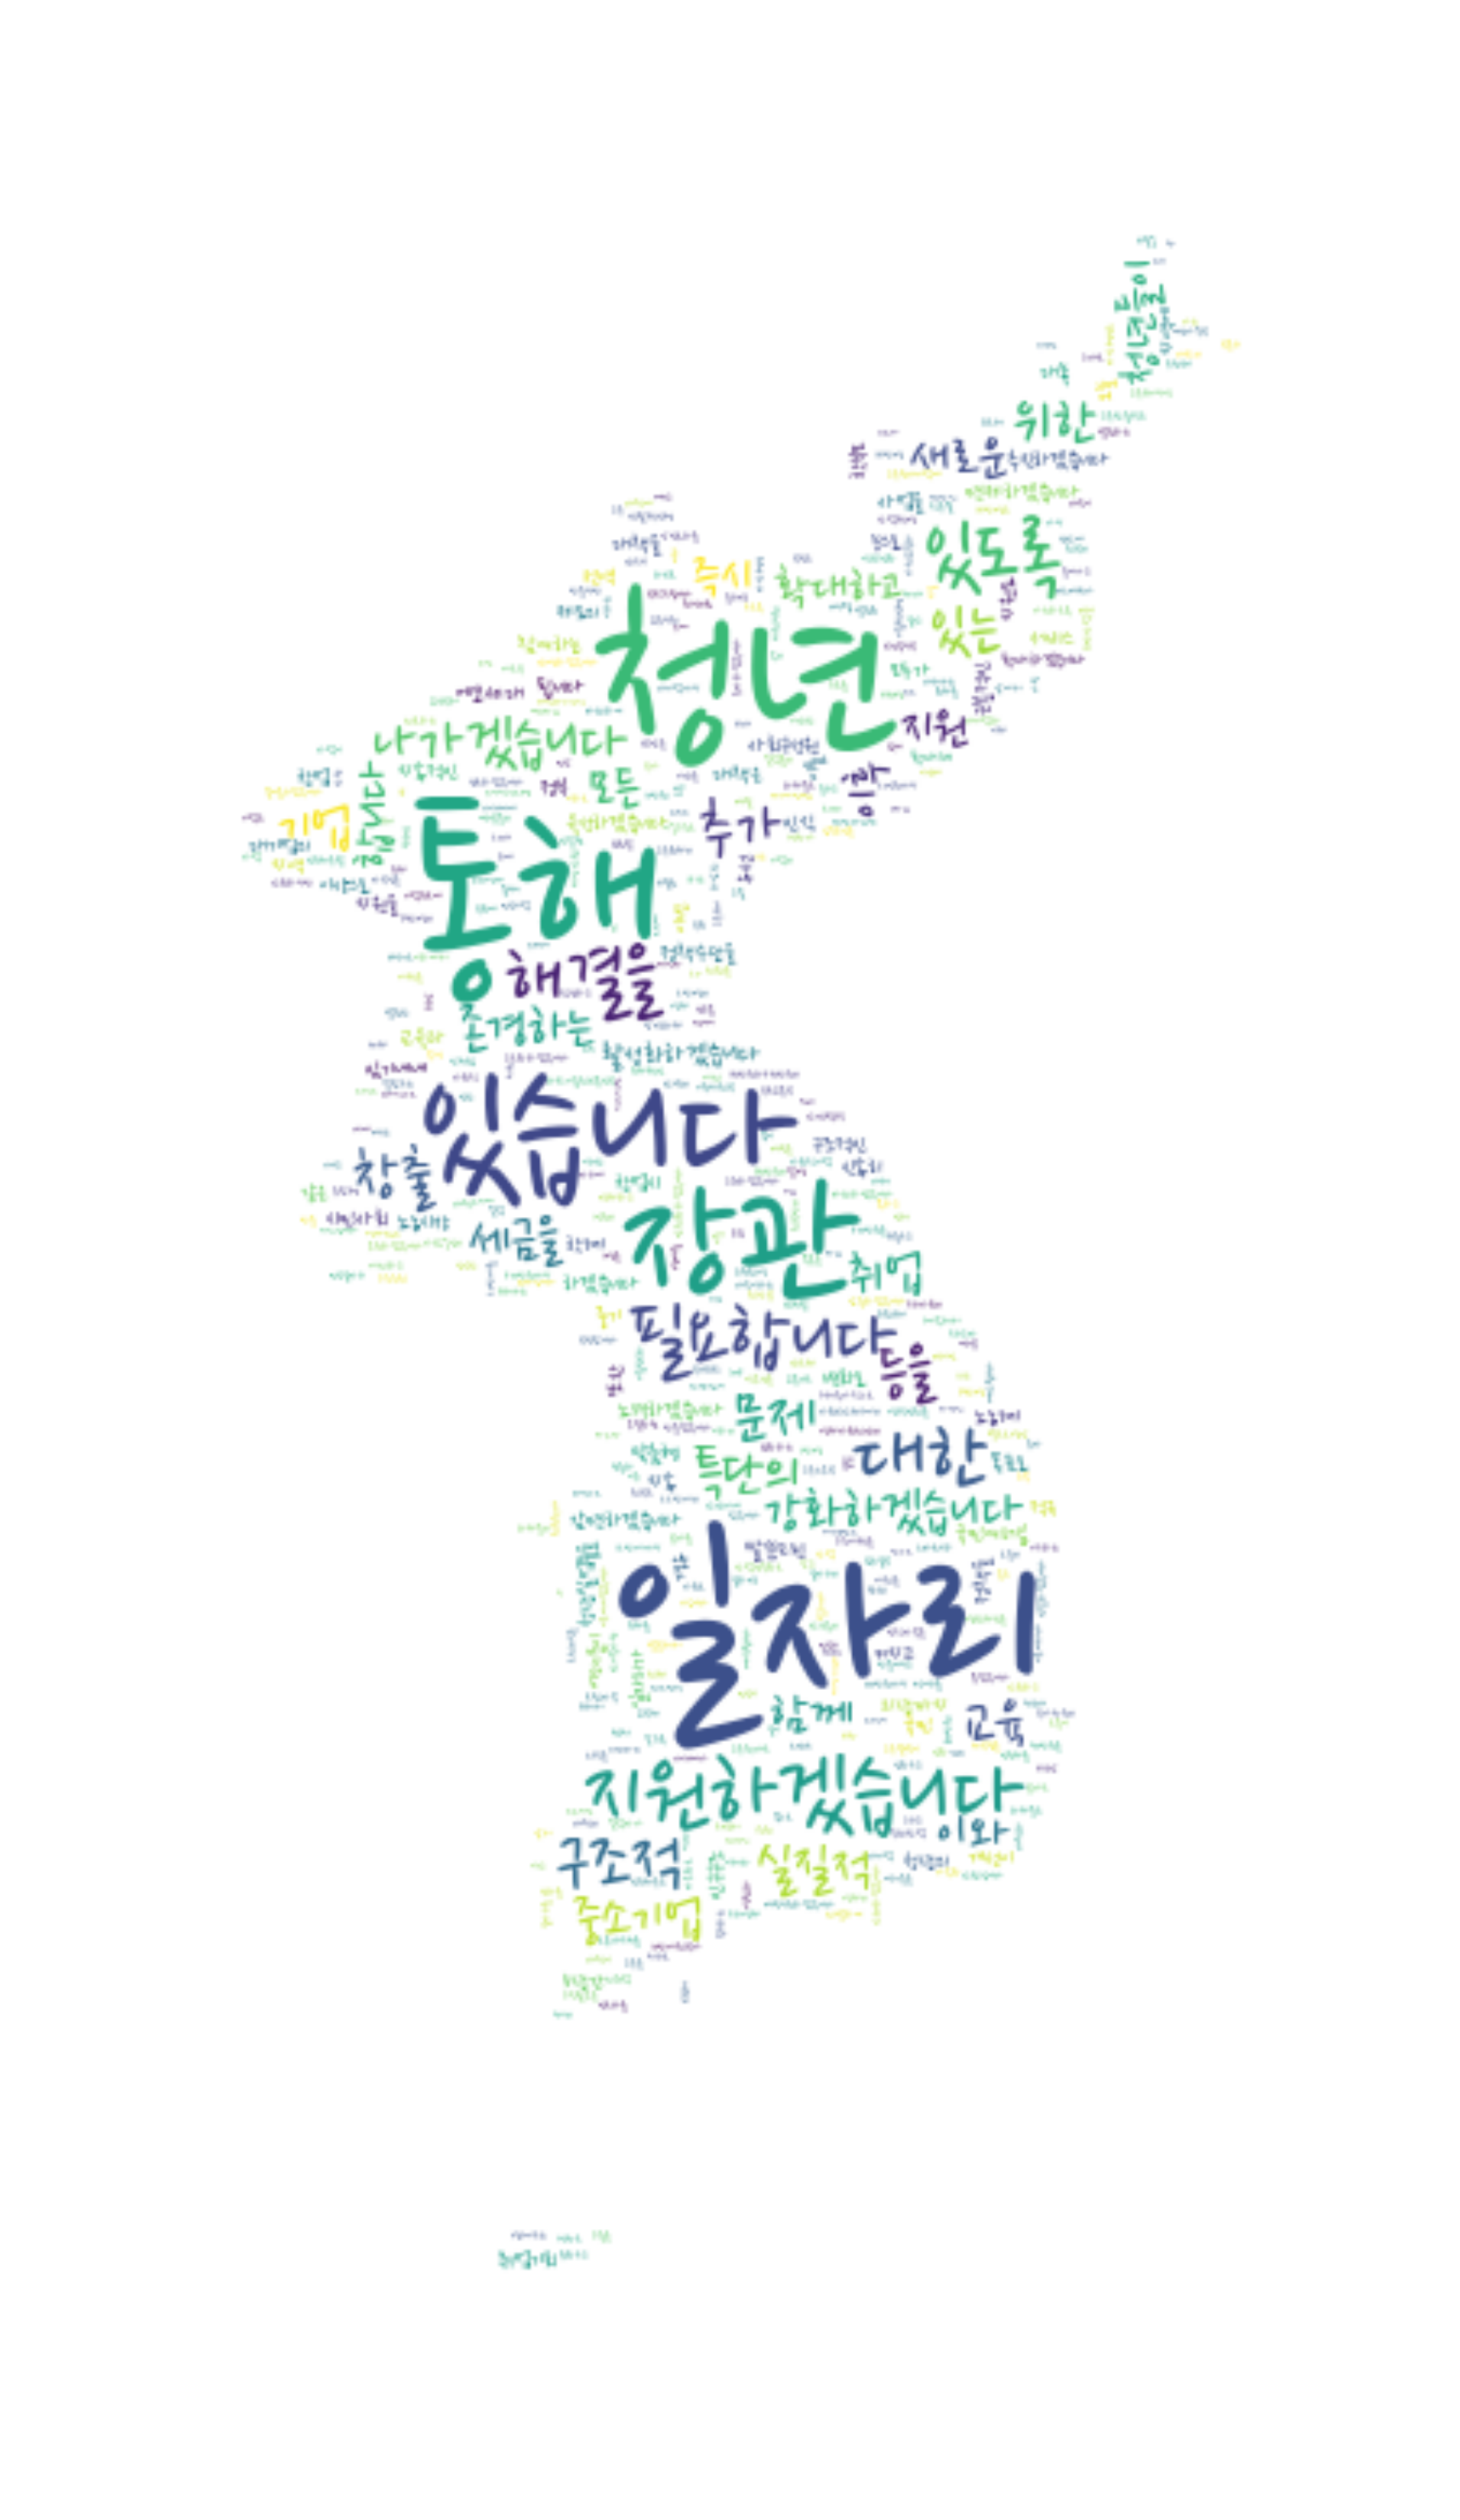

In [17]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("연설문.png") # 그림파일로 추출하기